# Leitura e visualização do ERA5

## Importar bibliotecas **`xarray`**

In [1]:
import xarray as xr

## Ler dados

In [2]:
ds_ERA5 = xr.open_dataset('../data/ERA5_PA_20200601.nc')


In [3]:
ds_ERA5

<xarray.Dataset>
Dimensions:    (longitude: 201, latitude: 101, time: 4)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -35.5 -35.25 -35.0
  * latitude   (latitude) float32 -50.0 -50.25 -50.5 ... -74.5 -74.75 -75.0
  * time       (time) datetime64[ns] 2020-06-01 ... 2020-06-01T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-16 18:13:00 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [4]:
ds_REMA = xr.open_dataset('../data/DEM/SSI_250m.nc')
ds_REMA

<xarray.Dataset>
Dimensions:  (lat: 540, lon: 1696)
Coordinates:
  * lat      (lat) float64 -63.06 -63.06 -63.06 -63.05 ... -61.72 -61.72 -61.71
  * lon      (lon) float64 -61.78 -61.78 -61.77 -61.77 ... -57.55 -57.54 -57.54
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.0.4, released 2020/01/28
    history:             Tue Jul 16 15:00:28 2024: GDAL CreateCopy( SSI_250m....

Usando **`xarray`**, podemos visualizar nossos dados de forma mais estruturada. Vamos dar uma olhada na estrutura dos nossos dados. Ela é composta de coordenadas, variáveis e atributos.

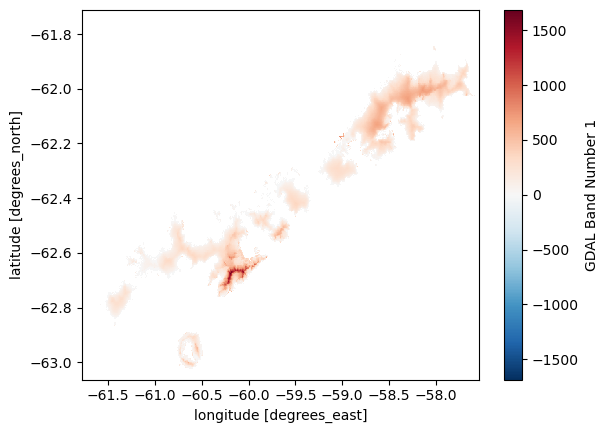

In [5]:
ds_REMA.Band1.plot()

In [6]:
print(ds_REMA.lat.min().values)
print(ds_REMA.lat.max().values)
print(ds_REMA.lon.min().values)
print(ds_REMA.lon.max().values)

-63.06157779122315
-61.71333097777685
-61.77911496850295
-57.54038271349705


In [7]:
ds_ERA5_crop = ds_ERA5.sel(longitude=slice(ds_REMA.lon.min().values, ds_REMA.lon.max().values),
                           latitude=slice(ds_REMA.lat.max().values, ds_REMA.lat.min().values))
ds_ERA5_crop

<xarray.Dataset>
Dimensions:    (longitude: 17, latitude: 6, time: 4)
Coordinates:
  * longitude  (longitude) float32 -61.75 -61.5 -61.25 ... -58.25 -58.0 -57.75
  * latitude   (latitude) float32 -61.75 -62.0 -62.25 -62.5 -62.75 -63.0
  * time       (time) datetime64[ns] 2020-06-01 ... 2020-06-01T18:00:00
Data variables:
    u10        (time, latitude, longitude) float32 8.429 8.388 ... 3.133 3.482
    v10        (time, latitude, longitude) float32 -6.028 -5.792 ... -4.009
    t2m        (time, latitude, longitude) float32 275.0 275.0 ... 272.8 272.5
    z          (time, latitude, longitude) float32 -2.834 8.005 ... -118.7 140.1
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-16 18:13:00 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [18]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

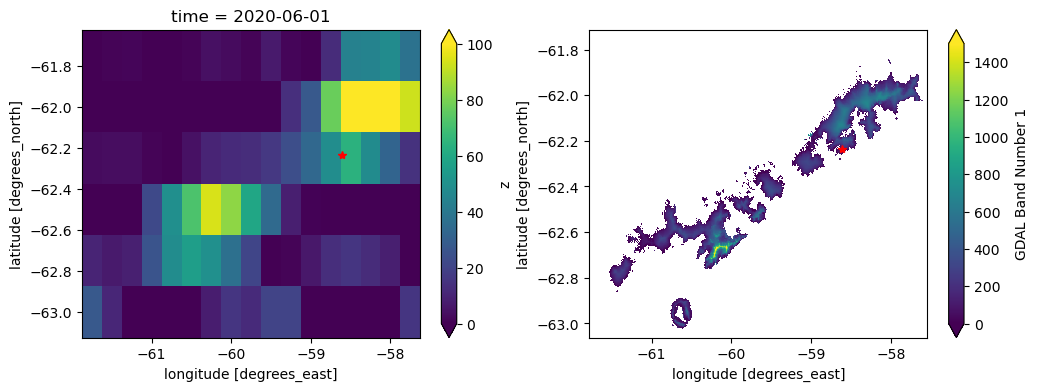

In [33]:
fig = plt.figure(figsize=(12, 4))

gs = gridspec.GridSpec(1, 2)
plots = {}

ax = plt.subplot(gs[0, 0]) # row 0, col 0
plots['ERA5'] = (ds_ERA5_crop.z[0]/9.10).plot(ax=ax, vmin=0, vmax=100)
ax.plot(-58.613468, -62.235946, 'r*')

ax = plt.subplot(gs[0, 1]) # row 0, col 0
plots['REMA'] = ds_REMA.Band1.plot(ax=ax, vmin=0, vmax=1500)
ax.plot(-58.613468, -62.235946, 'r*')
